In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

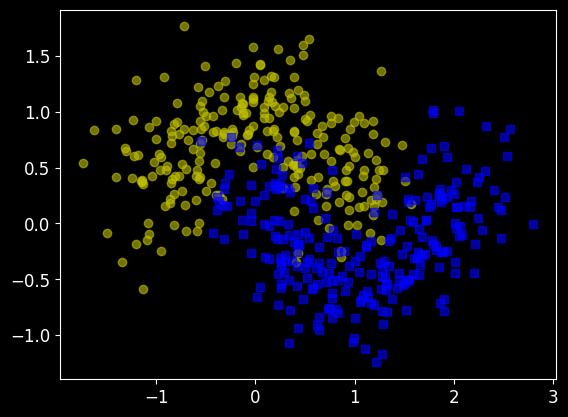

In [10]:
plt.plot(X[:,0][y==0],X[n :,1][y==0],'yo',alpha =0.6)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',alpha =0.6)

In [18]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting = 'hard')

In [19]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [22]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


In [23]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True,random_state=42)

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting = 'soft')

In [24]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [44]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                  n_estimators=500,
                  max_samples =100,
                  bootstrap=True,
                  n_jobs=-1,
                  random_state=42
                  )
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.904

In [47]:
tree_clf= DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred_tree = tree_clf.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred_tree)

0.856

In [51]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,X,y,axes=[-1.5,2.5,-1,1.5],alpha=0.5,contour =True):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,cmap = custom_cmap,alpha=0.3)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred,cmap = custom_cmap2,alpha=0.8)
    plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',alpha = 0.6)
    plt.plot(X[:,0][y==0],X[:,1][y==1],'bs',alpha = 0.6)
    plt.axis(axes)
    plt.xlabel('x1')
    plt.xlabel('x2')

Text(0.5, 1.0, 'Decision Tree with Bagging')

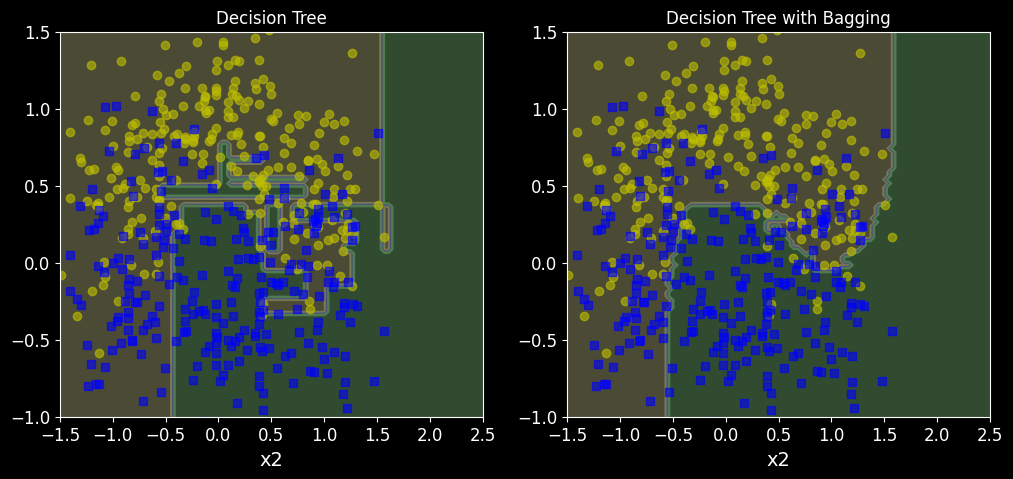

In [55]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_decision_boundary(tree_clf,X,y)
plt.title('Decision Tree')
plt.subplot(122)
plot_decision_boundary(bag_clf,X,y)
plt.title('Decision Tree with Bagging')

In [59]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                  n_estimators=500,
                  max_samples =100,
                  bootstrap=True,
                  n_jobs=-1,
                  random_state=42,
                  oob_score=True
                  )
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9253333333333333

In [60]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.904

In [61]:
bag_clf.oob_decision_function_

array([[0.35579515, 0.64420485],
       [0.43243243, 0.56756757],
       [1.        , 0.        ],
       [0.01030928, 0.98969072],
       [0.03174603, 0.96825397],
       [0.07672634, 0.92327366],
       [0.39189189, 0.60810811],
       [0.06145251, 0.93854749],
       [0.92689295, 0.07310705],
       [0.88205128, 0.11794872],
       [0.59850374, 0.40149626],
       [0.04896907, 0.95103093],
       [0.7539267 , 0.2460733 ],
       [0.81377551, 0.18622449],
       [0.88528678, 0.11471322],
       [0.07407407, 0.92592593],
       [0.04738155, 0.95261845],
       [0.92051282, 0.07948718],
       [0.69974555, 0.30025445],
       [0.94358974, 0.05641026],
       [0.06100796, 0.93899204],
       [0.224     , 0.776     ],
       [0.9125964 , 0.0874036 ],
       [0.98746867, 0.01253133],
       [0.95967742, 0.04032258],
       [0.        , 1.        ],
       [0.94255875, 0.05744125],
       [1.        , 0.        ],
       [0.03466667, 0.96533333],
       [0.7020202 , 0.2979798 ],
       [0.

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
from sklearn.datasets import load_iris
iris = load_iris()
rf_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf_clf.fit(iris['data'],iris['target'])
for name,score in zip(iris['feature_names'],rf_clf.feature_importances_):
    print(name,score)


sepal length (cm) 0.09884841674668464
sepal width (cm) 0.020397820519773388
petal length (cm) 0.43193696327082215
petal width (cm) 0.44881679946271985


In [69]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [71]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
 0           0       0       0       0  ...         0         0         0         0
 1           0       0       0       0  ...         0         0         0         0
 2           0       0       0       0  ...         0         0         0         0
 3           0       0       0       0  ...         0         0         0         0
 4           0       0       0       0  ...         0         0         0         0
 ...       ...     ...     ...     ...  ...       ...       ...       ...       ...
 69995       0       0       0       0  ...         0         0         0         0
 69996       0       0       0       0  ...         0         0         0         0
 69997       0       0       0       0  ...         0         0         0         0
 69998       0       0       0       0  ...         0         0         0         0
 69999       0       0       0       0  ...         0         0     

In [75]:
rf_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf_clf.fit(mnist['data'],mnist['target'])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [77]:
rf_clf.feature_importances_.shape

(784,)

In [78]:
rf_clf.feature_importances_


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.10965743e-07, 6.13046492e-08, 0.00000000e+00, 6.15610015e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.77357680e-08, 1.26761197e-06, 2.60042644e-06,
       2.21039500e-06, 1.65058220e-06, 2.16786690e-06, 5.12156274e-06,
       3.42419164e-06, 3.00158758e-06, 3.97213670e-06, 4.01181829e-06,
       5.01879053e-06, 1.92688652e-06, 2.56710711e-06, 5.94852841e-07,
       1.49080165e-06, 2.98030387e-07, 9.01467803e-07, 4.94556479e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [79]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=matplotlib.cm.hot)
    plt.axis('off')



[Text(1, 0.0, 'Not important'), Text(1, 0.01006468511492459, 'Very Important')]

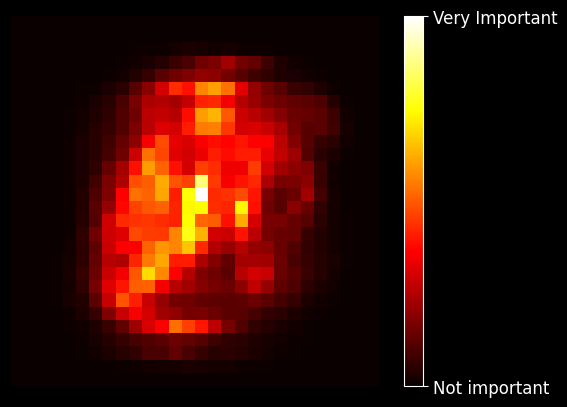

In [82]:
plot_digit(rf_clf.feature_importances_)
char = plt.colorbar(ticks=[rf_clf.feature_importances_.min(),rf_clf.feature_importances_.max()])
char.ax.set_yticklabels(['Not important','Very Important'])

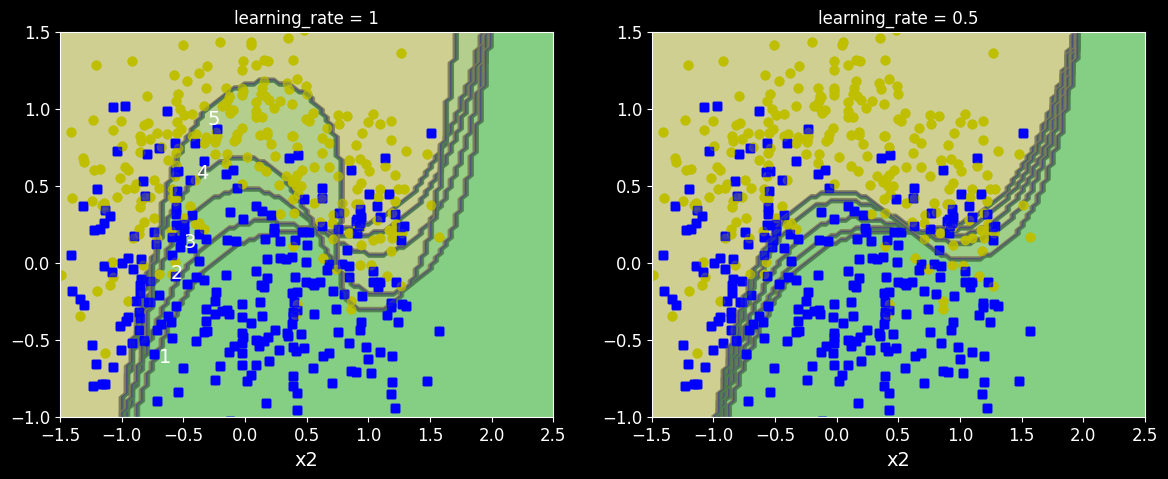

In [87]:
from sklearn.svm import SVC

m = len(X_train)
plt.figure(figsize=(14,5))
for subplot,learning_rate in ((121,1),(122,0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel='rbf',C=0.05,random_state=42)
        svm_clf.fit(X_train,y_train,sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred!=y_train] *= (1+learning_rate)
        plot_decision_boundary(svm_clf,X,y,alpha=0.2)
        plt.title('learning_rate = {}'.format(learning_rate))
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
plt.show()

In [89]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                   n_estimators=200,
                   learning_rate=0.5,
                   random_state=42
                   )

In [90]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

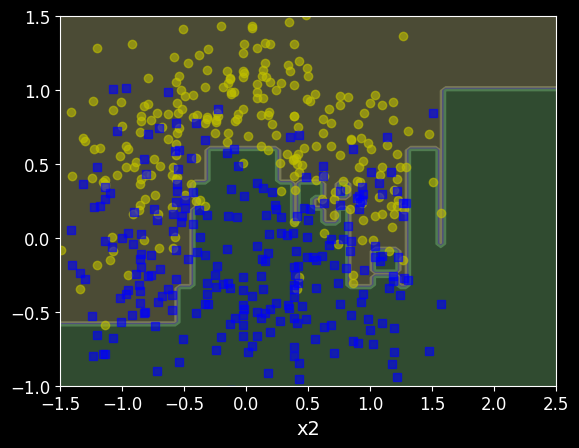

In [91]:
plot_decision_boundary(ada_clf,X,y)

In [110]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05*np.random.randn(100)

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [114]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2)

In [118]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2)

In [119]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))
y_pred

array([0.75026781])

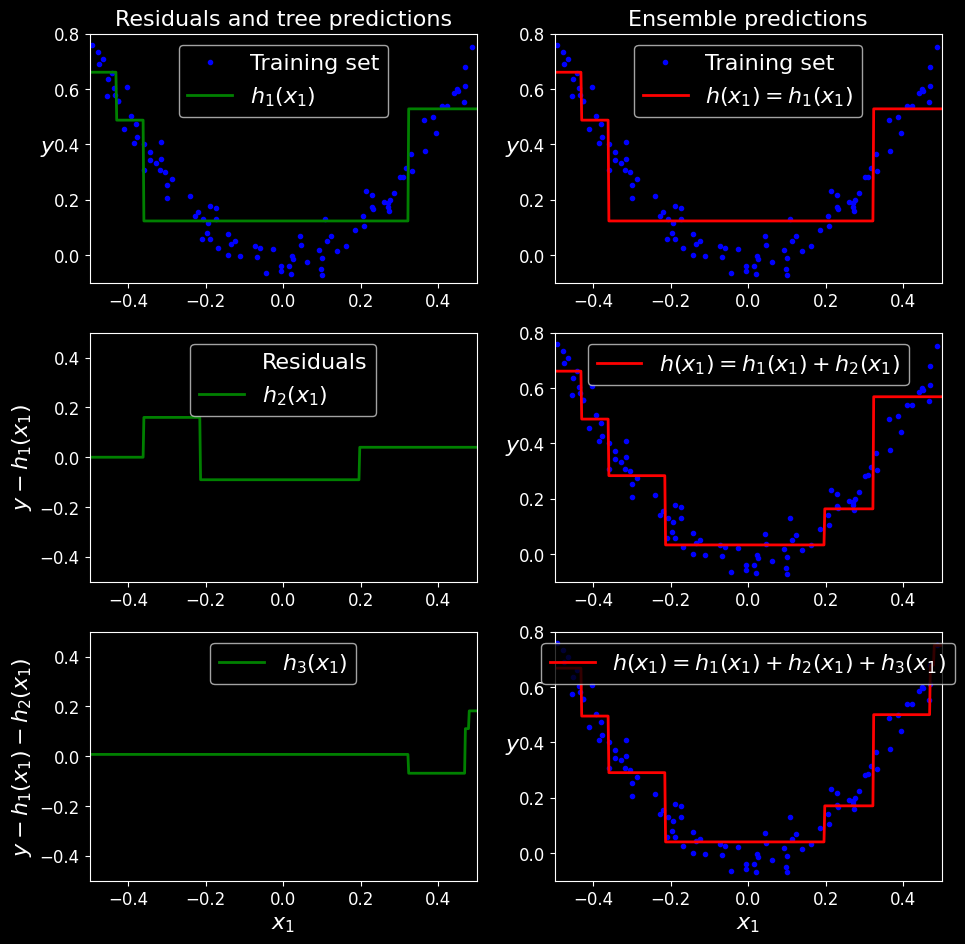

In [120]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [124]:
gbrt=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0,
    random_state=41,
)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=41)

In [125]:
gbrt_slow_1=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=0.1,
    random_state=41,
)
gbrt_slow_1.fit(X,y)

GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=41)

In [126]:
gbrt_slow_2=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=200,
    learning_rate=0.1,
    random_state=41,
)
gbrt_slow_2.fit(X,y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=41)

Text(0.5, 1.0, 'learning_rate=0.1,n_estimators=3')

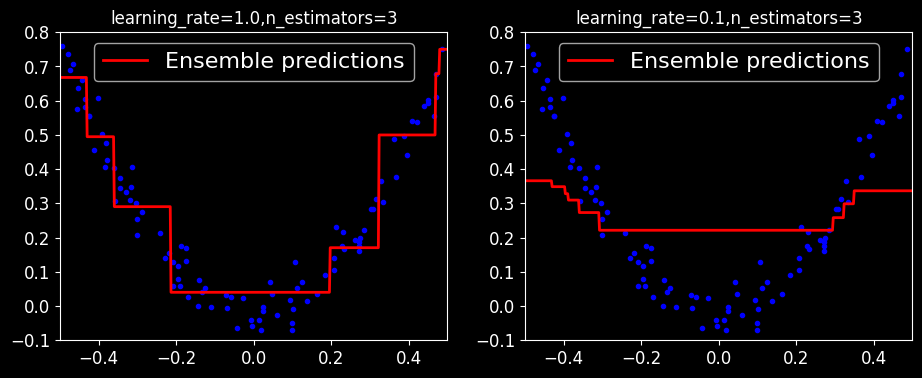

In [127]:
plt.figure(figsize = (11,4))
plt.subplot(121)
plot_predictions([gbrt],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt.learning_rate,gbrt.n_estimators))

plt.subplot(122)
plot_predictions([gbrt_slow_1],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_1.learning_rate,gbrt_slow_1.n_estimators))

plt.figure(figsize = (11,4))
plt.subplot(121)
plot_predictions([gbrt_slow_2],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_2.learning_rate,gbrt_slow_2.n_estimators))

plt.subplot(122)
plot_predictions([gbrt_slow_1],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_1.learning_rate,gbrt_slow_1.n_estimators))


plt.figure(figsize = (11,4))
plt.subplot(121)
plot_predictions([gbrt_slow_2],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_2.learning_rate,gbrt_slow_2.n_estimators))

plt.subplot(122)
plot_predictions([gbrt_slow_1],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_1.learning_rate,gbrt_slow_1.n_estimators))


Text(0.5, 1.0, 'learning_rate=0.1,n_estimators=3')

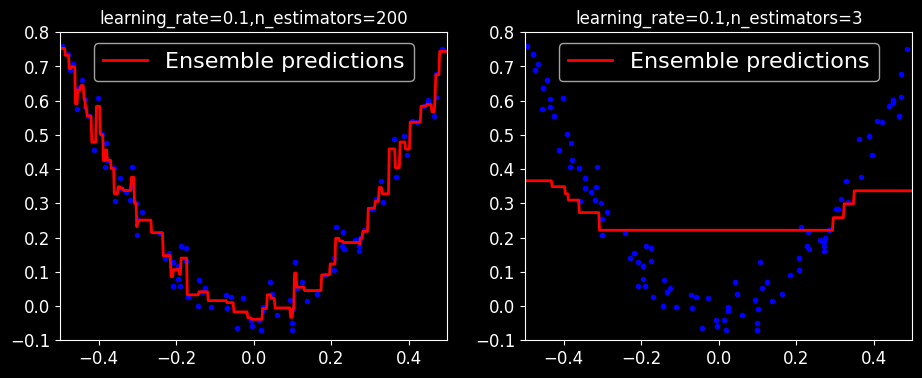

In [128]:
plt.figure(figsize = (11,4))
plt.subplot(121)
plot_predictions([gbrt_slow_2],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_2.learning_rate,gbrt_slow_2.n_estimators))

plt.subplot(122)
plot_predictions([gbrt_slow_1],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title('learning_rate={},n_estimators={}'.format(gbrt_slow_1.learning_rate,gbrt_slow_1.n_estimators))


In [143]:
from sklearn.metrics import mean_squared_error
X_train,X_val, y_train,y_val=train_test_split(X,y,random_state=49)
gbrt=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=120,
    random_state=42,
)
gbrt.fit(X_train,y_train)
errors = [mean_squared_error(y_val,y_pred)for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=bst_n_estimators,
    random_state=49,
)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=np.int64(55),
                          random_state=49)

In [144]:
errors

[np.float64(0.03976434066090687),
 np.float64(0.03301153878946109),
 np.float64(0.027663386192027795),
 np.float64(0.023337263188229852),
 np.float64(0.020390590545872743),
 np.float64(0.017820174421765502),
 np.float64(0.015262814214454865),
 np.float64(0.013228529533567415),
 np.float64(0.011758450328306618),
 np.float64(0.01028833552930663),
 np.float64(0.009391268210618016),
 np.float64(0.008605826199167754),
 np.float64(0.007745553291052829),
 np.float64(0.007083571270654957),
 np.float64(0.0067662961350210115),
 np.float64(0.006116142333014484),
 np.float64(0.005770219779341232),
 np.float64(0.005416351332327169),
 np.float64(0.005072739471024466),
 np.float64(0.0048159263120028765),
 np.float64(0.004357591913537005),
 np.float64(0.004192866645244622),
 np.float64(0.0039670672414243964),
 np.float64(0.0038463154458755833),
 np.float64(0.0037468374981679863),
 np.float64(0.0035309097443872394),
 np.float64(0.003467753385928563),
 np.float64(0.0033882676886440514),
 np.float64(0.00

In [145]:
min_error=np.min(errors)
min_error

np.float64(0.002712853325235463)

Text(0.5, 1.0, 'Best Model(55 trees)')

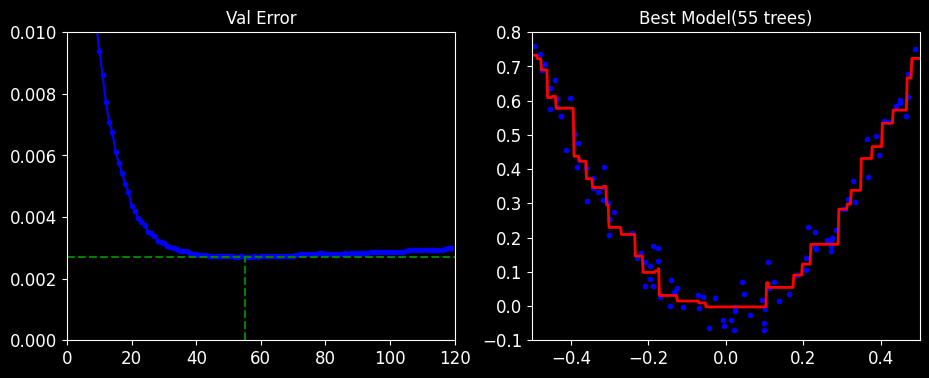

In [149]:
plt.figure(figsize = (11,4))
plt.subplot(121)
plt.plot(errors,'b.-')
plt.plot([bst_n_estimators,bst_n_estimators],[0,min_error],'g--')
plt.plot([0,120],[min_error,min_error],'g--')
plt.axis([0,120,0,0.01])
plt.title('Val Error')

plt.subplot(122)
plot_predictions([gbrt_best],X,y,axes=[-0.5,0.5,-0.1,0.8])
plt.title('Best Model(%d trees)'%bst_n_estimators)


In [154]:
gbrt = GradientBoostingRegressor(max_depth = 2,
                             random_state = 42,
                                 warm_start =True
)
error_going_up = 0
min_val_error = float('inf')

for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train,y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val,y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up == 5:
            break
        

In [155]:
print(gbrt.n_estimators_)

61
